# 3.1 Phân tích về reactions
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 3.1.1 Cài đặt thư viện và chuẩn bị dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Data/GenshinImpact.vi_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_url        123 non-null    object
 1   post_text       123 non-null    object
 2   time            123 non-null    object
 3   image           91 non-null     object
 4   video           12 non-null     object
 5   comments        123 non-null    int64 
 6   shares          123 non-null    int64 
 7   user_id         123 non-null    int64 
 8   comments_full   123 non-null    object
 9   reaction_count  123 non-null    int64 
 10  thích           123 non-null    int64 
 11  yêu thích       123 non-null    int64 
 12  haha            123 non-null    int64 
 13  wow             123 non-null    int64 
 14  thương thương   123 non-null    int64 
 15  buồn            123 non-null    int64 
 16  phẫn nộ         123 non-null    int64 
 17  posted_hour     123 non-null    int64 
dtypes: int64(1

## 3.1.2 Tìm ra bài viết có lượng tương tác nổi bật

### 3.1.2.1 Tìm ra bài viết có lượng tương tác lớn nhất (nhiều reaction/ nhiều comment/ nhiều share)

In [4]:
most_reacted_post = df.loc[df['reaction_count'].idxmax()]
print(most_reacted_post['post_url'])
most_commented_post = df.loc[df['comments'].idxmax()]
print(most_commented_post['post_url'])
most_shared_post = df.loc[df['shares'].idxmax()]
print(most_shared_post['post_url'])

https://facebook.com/GenshinImpact.vi/posts/645940037693284
https://facebook.com/GenshinImpact.vi/posts/648593290761292
https://facebook.com/GenshinImpact.vi/posts/645940037693284


### 3.1.2.2 Tìm ra bài viết có lượng cảm xúc tích cục lớn nhất (thích / yêu thích / haha / wow / thương thương)

In [5]:
most_like_post = df.loc[df['thích'].idxmax()]
print(most_like_post['post_url'])
most_love_post = df.loc[df['yêu thích'].idxmax()]
print(most_love_post['post_url'])
most_haha_post = df.loc[df['haha'].idxmax()]
print(most_haha_post['post_url'])
most_wow_post = df.loc[df['wow'].idxmax()]
print(most_wow_post['post_url'])
most_care_post = df.loc[df['thương thương'].idxmax()]
print(most_care_post['post_url'])

https://facebook.com/GenshinImpact.vi/posts/640539934899961
https://facebook.com/GenshinImpact.vi/posts/645940037693284
https://facebook.com/GenshinImpact.vi/posts/646511644302790
https://facebook.com/GenshinImpact.vi/posts/650114193942535
https://facebook.com/GenshinImpact.vi/posts/645940037693284


### 3.1.2.3 Tìm ra bài viết có lượng cảm xúc tiêu cực lớn nhất (buồn/ phẫn nộ)

In [6]:
most_sad_post = df.loc[df['buồn'].idxmax()]
print(most_sad_post['post_url'])
most_angry_post = df.loc[df['phẫn nộ'].idxmax()]
print(most_angry_post['post_url'])

https://facebook.com/GenshinImpact.vi/posts/646511644302790
https://facebook.com/GenshinImpact.vi/posts/646511644302790


## 3.1.3 Phân tích về reactions

### 3.1.3.1 Sự thay đổi tổng số reactions theo thời gian

<Figure size 2000x1000 with 0 Axes>

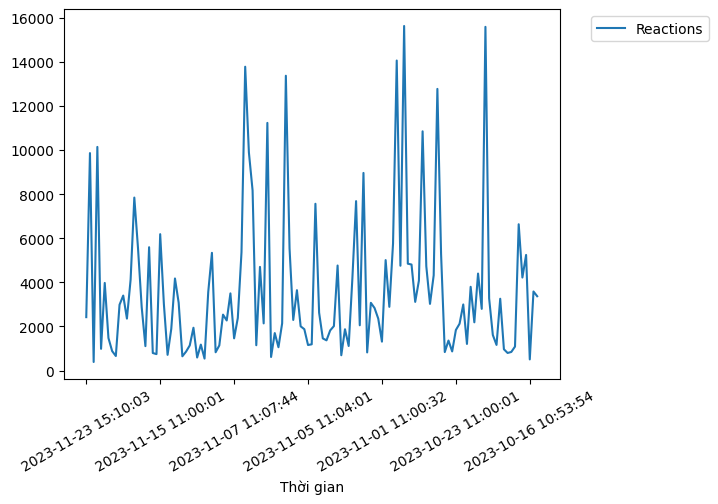

In [7]:
plt.figure(figsize=(20, 10))
df.plot(x='time', y='reaction_count', label = "Reactions")
plt.xlabel('Thời gian')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3.1.3.2 Sự thay đổi từng cảm xúc theo thời gian

<Figure size 1600x800 with 0 Axes>

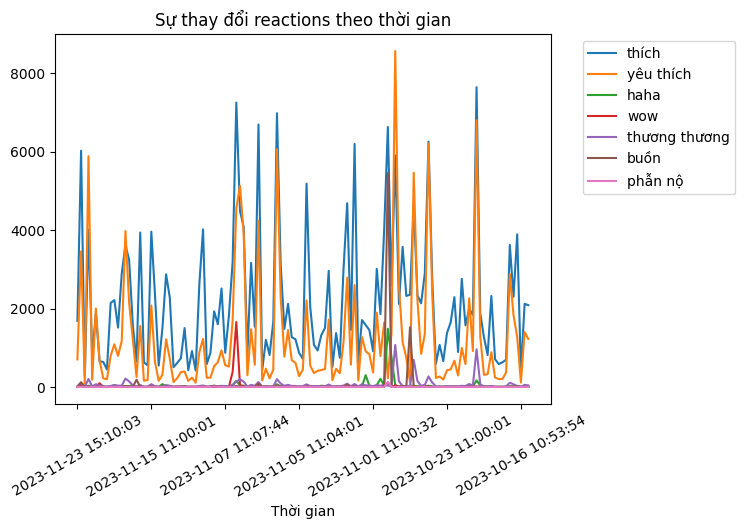

In [8]:
plt.figure(figsize=(16, 8))
df.plot(x='time', y=['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ'])
plt.xlabel('Thời gian')
plt.xticks(rotation = 30)
plt.title('Sự thay đổi reactions theo thời gian')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 3.1.3.3 Tổng số lượng các cảm xúc các loại

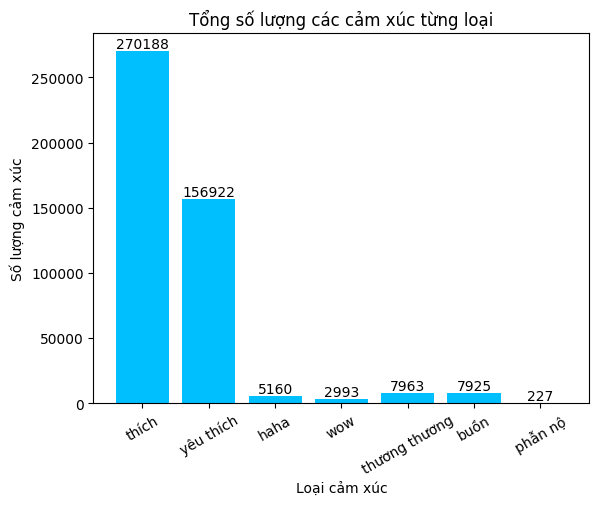

In [9]:
# Tính tổng số lượng cảm xúc cho mỗi cột
total_emotions = df[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn' , 'phẫn nộ']].sum()

# Vẽ biểu đồ
plt.bar(total_emotions.index, total_emotions.values, color='deepskyblue')
plt.xlabel('Loại cảm xúc')
plt.xticks(rotation = 30)
plt.ylabel('Số lượng cảm xúc')
plt.title('Tổng số lượng các cảm xúc từng loại')

# Hiển thị giá trị trên cột
for i, value in enumerate(total_emotions.values):
    plt.text(total_emotions.index[i], value + 0.1, str(value), ha='center', va='bottom')

plt.show()

### 3.1.3.4 Tương quan giữa số lượng cảm xúc tiêu cực và số lượng cảm xúc tích cực

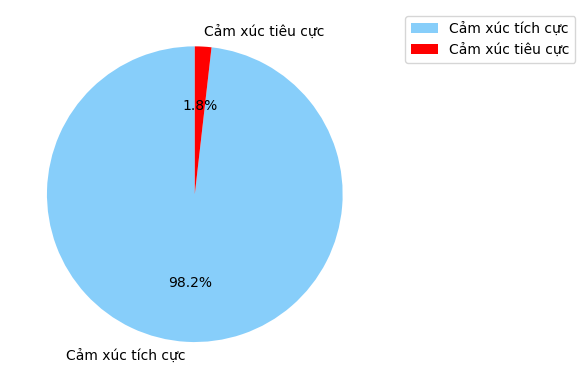

In [10]:
total_positive_reactions = df[['thích' , 'yêu thích' , 'haha' , 'wow' , 'thương thương']].sum().sum()
total_negative_reactions = df[['buồn' , 'phẫn nộ']].sum().sum()

# Labels cho các phần
labels = ['Cảm xúc tích cực', 'Cảm xúc tiêu cực']

# Màu sắc cho các phần
colors = ['lightskyblue', 'red']

data = [total_positive_reactions, total_negative_reactions]

# Vẽ biểu đồ pie
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')